<a href="https://colab.research.google.com/github/Poeto0456/Data-science-salary/blob/main/Data_science_salary_Duy_Anh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Lý do chọn đề tài**

Mục tiêu của bài phân tích này nhằm dựa vào các yếu tố của bộ data tìm ra mối liên hệ giữa chúng và mức lương của một DS. Với thực tế nhân lực cho các công việc liên quan đến data đang ngành càng nhiều và nhu cầu quan tâm của họ đến mức lương của ngành là rất lớn, bài phân tích này nhằm đáp ứng nhu cầu khám phá trong tương lai các yếu tố sẽ quyết định mức lương như trình độ, kinh nghiệm, quy mô công ty,....

**Các yếu tố trong dataset**

1. work_year: năm cụ thể mà tiền lương được giải ngân.
2. experience_level: mức độ kinh nghiệm.
3. jobs_type: bản chất của hợp đồng lao động như toàn thời gian, bán thời gian,...
4. job_title: vai trò của một cá nhân trong công ty
5. salary: tổng lương của cá nhân
6. salary_currency: loại tiền tệ cụ thể được dùng để trả lương, được biểu thị bằng mã ISO 4217
7. salaryinusd: tổng số tiền lương quy đổi sang đô la Mỹ
8. empolyee_residence: quốc gia cư trú chính của nhân viên
9. remote_ratio: tỷ lệ công việc được thực hiện từ xa
10. company_location: vị trí của văn phòng chính của người sử dụng lao động
11. company_size: số lượng nhân viên trung bình của công ty trong năm làm việc.


**Các model được sử dụng**

Sử dụng 6 model chính là RandomForest, LightGBM, KNeighbors, GradientBoosting, DecisionTree, XGB

**Lý do chọn các model này**

1. RandomForest và GradientBoosting: Là các ensemble model, kết hợp nhiều decision tree đơn giản hơn. Việc kết hợp nhiều model giúp tránh overfitting và nâng cao độ chính xác.
2. LightGBM: Là implementation hiệu quả hơn của gradient boosted decision tree. Huấn luyện nhanh hơn, tiêu tốn ít bộ nhớ hơn.
3. KNeighbors: Là một model cơ bản, dễ hiểu. Có thể capture được các mối quan hệ phức tạp trong dữ liệu.
4. DecisionTree: Là base model đơn giản, dễ interpret. Có thể sử dụng làm baseline.
5. XGB: Là gradient boosted framework mạnh mẽ, có thể xây dựng các model phức tạp với hiệu năng cao.

In [ ]:
# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import Scikit-learn for Machine Learning libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries (6).csv


In [ ]:
data = pd.read_csv('ds_salaries.csv')

# EDA

**Check null and missing values**

In [ ]:
null_ratios = data.isnull().sum() / len(data) * 100

cols_with_na = null_ratios[null_ratios > 0].sort_values(ascending=False)

top_na_cols = cols_with_na.head(20)

missing_data = pd.DataFrame({'Missing Ratio': top_na_cols})
print(missing_data)

Empty DataFrame
Columns: [Missing Ratio]
Index: []


**Check duplicates**

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_data.shape)

number of duplicate rows: (1171, 11)


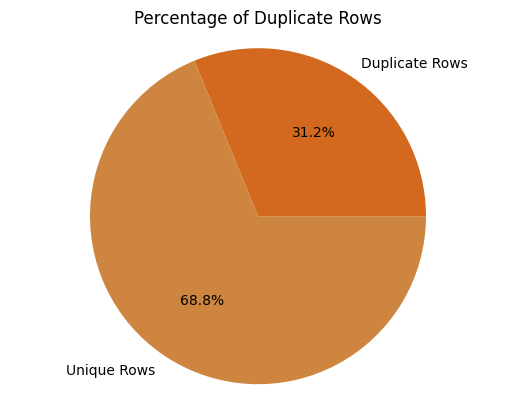

In [ ]:
import matplotlib.pyplot as plt

# Extract number of duplicates
num_duplicates = duplicate_rows_data.shape[0]

# Create pie chart
labels = ['Duplicate Rows', 'Unique Rows']
sizes = [num_duplicates, len(data) - num_duplicates]

colors = ['#D2691E', '#CD853F'] # lighter brown colors

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Duplicate Rows')
plt.axis('equal')

plt.show()

**Explore the data**

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:
data['experience_level'] = data['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

data['employment_type'] = data['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
data['company_size'] = data['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
data['remote_ratio'] = data['remote_ratio'].astype(str)
data['remote_ratio'] = data['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

**Feature engineering**

In [ ]:
unique_jobs = data['job_title'].unique()

print(list(unique_jobs))

['Principal Data Scientist', 'ML Engineer', 'Data Scientist', 'Applied Scientist', 'Data Analyst', 'Data Modeler', 'Research Engineer', 'Analytics Engineer', 'Business Intelligence Engineer', 'Machine Learning Engineer', 'Data Strategist', 'Data Engineer', 'Computer Vision Engineer', 'Data Quality Analyst', 'Compliance Data Analyst', 'Data Architect', 'Applied Machine Learning Engineer', 'AI Developer', 'Research Scientist', 'Data Analytics Manager', 'Business Data Analyst', 'Applied Data Scientist', 'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer', 'Head of Data', 'Data Science Manager', 'Data Manager', 'Machine Learning Researcher', 'Big Data Engineer', 'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer', 'Director of Data Science', 'Machine Learning Scientist', 'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician', 'Applied Machine Learning Scientist', 'Lead Data Scientist', 'Cloud Database Engineer', 'Financial Data Analyst', 'Data Infrastructure Engi

In [ ]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
data['job_category'] = data['job_title'].apply(assign_broader_category)

**Job distribution**

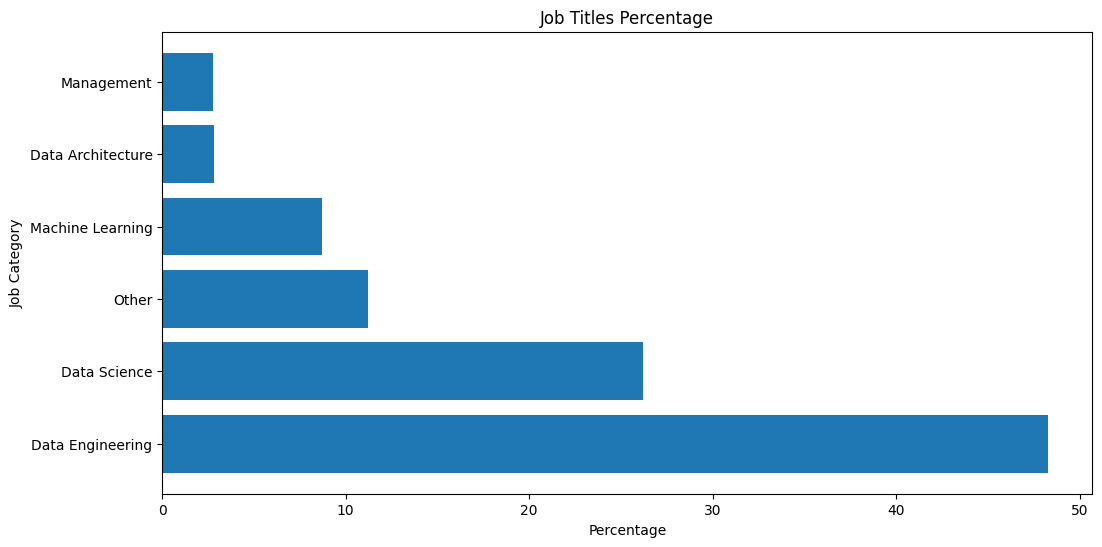

In [ ]:
category_percentages = data['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_categories = category_percentages.nlargest(17)
ax.barh(top_categories.index, top_categories.values)
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

**Distribution across different employment types**

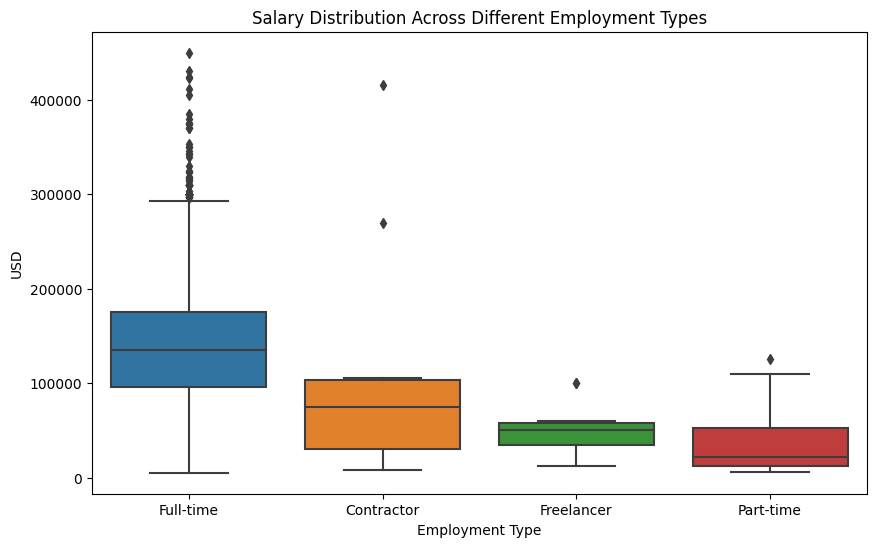

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('USD')
plt.show()

**Median salary by job title**

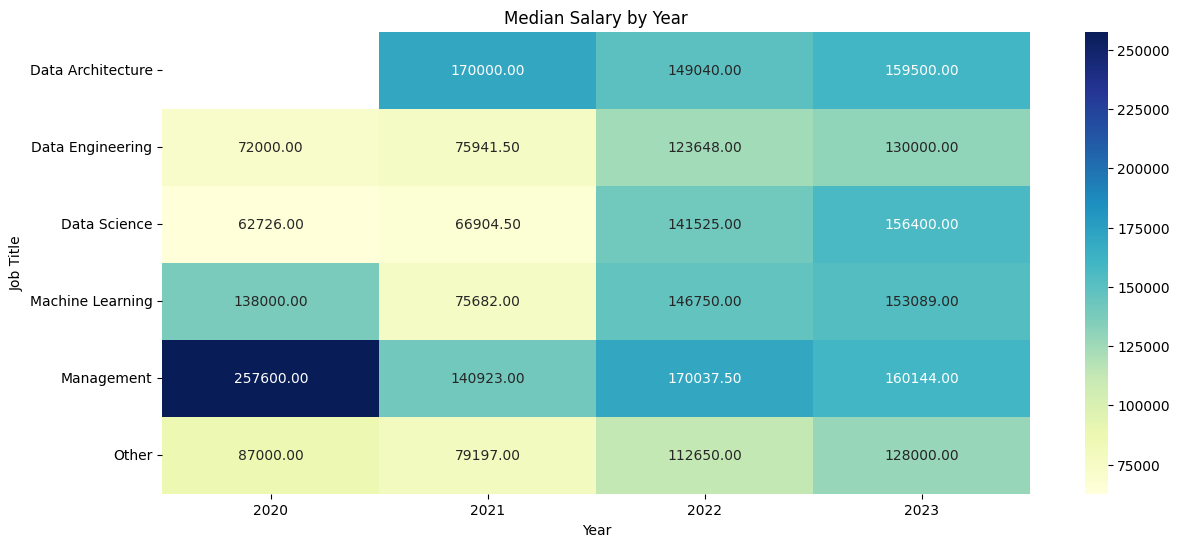

In [ ]:
df = data.copy()

#  Median salary by job title
pivot_table = df.pivot_table(values='salary_in_usd', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

# Correlation

In [ ]:
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['salary_in_usd']

In [ ]:
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

**Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled_numerical = StandardScaler().fit_transform(df[numerical_columns])

scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [ ]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary'], axis=1)

<ipython-input-19-30f5263861df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = processed_df.corr()


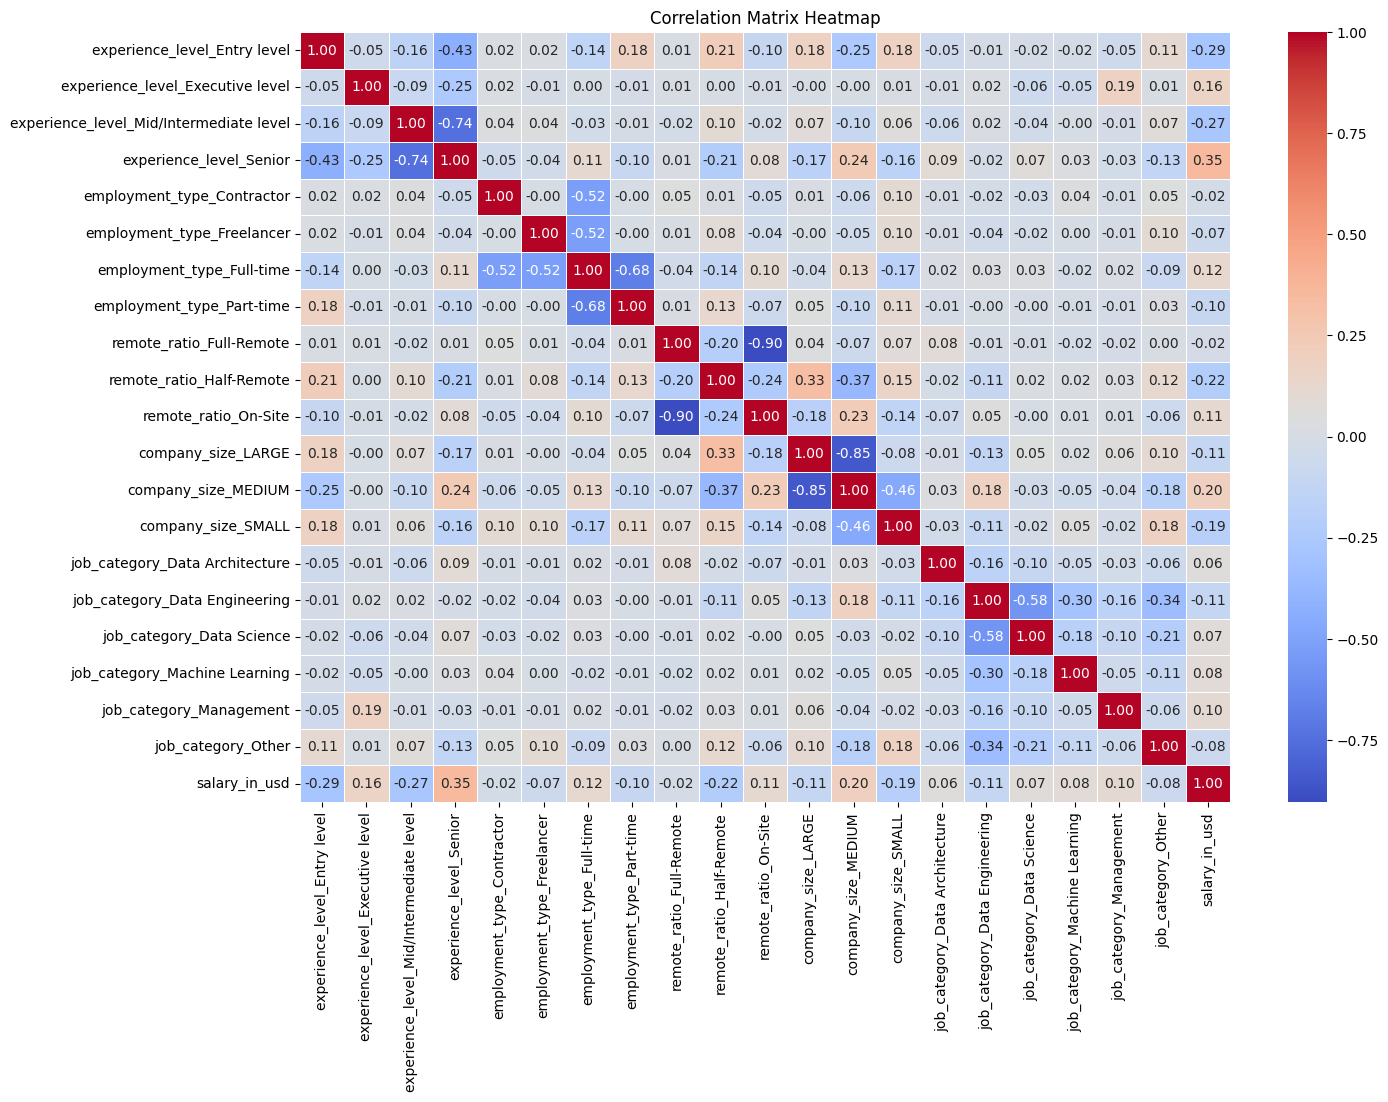

<ipython-input-19-30f5263861df>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = processed_df.corr()


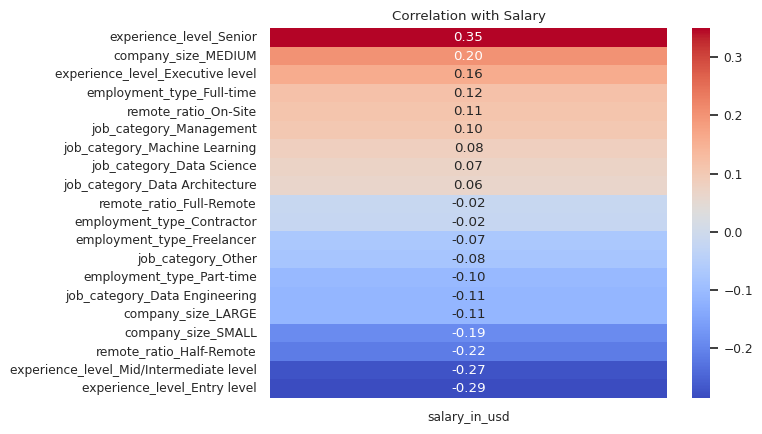

In [ ]:
correlation_matrix = processed_df.corr()

#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['salary_in_usd'].drop('salary_in_usd')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Salary')
plt.show()

# Predictive analysis

In [ ]:
df_fea = df.drop(columns=['employee_residence', 'company_location'])

In [ ]:
df_fea.company_size = df_fea.company_size.replace({'SMALL':1 ,'MEDIUM': 2, 'LARGE': 3})
df_fea['remote_ratio'] = df_fea['remote_ratio'].replace({'Full-Remote': 3, 'Half-Remote': 2, 'On-site': 1})
df_fea['experience_level'] = df_fea['experience_level'].replace({'Entry level': 1, 'Mid/Intermediate level': 2, 'Senior': 3, 'Executive level': 4})
df_fea['employment_type'] = df_fea['employment_type'].replace({'Freelancer':1 ,'Part-time': 2, 'Full-time': 3, 'Contractor': 4,})

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-22-a3b1a3480c80>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-22-a3b1a3480c80>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-22-a3b1a3480c80>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
cats = df_fea.select_dtypes(include="object").columns
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cols = [col for col in df_fea.columns if 10 >= df_fea[col].nunique() > 2]

df_fea = one_hot_encoder(df_fea, cats)

df_fea.head()

,work_year,experience_level,employment_type,salary,salary_in_usd,company_size,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,...,salary_currency_THB,salary_currency_TRY,salary_currency_USD,remote_ratio_3,remote_ratio_On-Site,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other
0,2023,3,3,80000,85847,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2023,2,4,30000,30000,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
2,2023,2,4,25500,25500,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,2023,3,3,175000,175000,2,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4,2023,3,3,120000,120000,2,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

df_fea= df_fea.drop(["salary"], axis=1)
y=df_fea['salary_in_usd']
X=df_fea.drop(['salary_in_usd'],axis=1)
X = scaler.fit_transform(X)
y= y.values.reshape(-1,1)
y = np.log(y)


def regression_(x, y):
    rf = RandomForestRegressor()
    lg = LGBMRegressor()
    kn = KNeighborsRegressor()
    gb = GradientBoostingRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()

    models = [rf,lg , kn, gb, dt,xgb]
    model_names = ["Random Forest","LGBM", 'KNeighbors', 'GradientBoosting',
                   'DecisionTree','XGB']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

    r_score = []
    mse = []
    mae = []

    result = pd.DataFrame(columns=['R_square', 'MSE', 'MAE'], index=model_names)

    for model in models:
        pred = model.fit(x_train, y_train).predict(x_test)
        r_score.append(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred) ** .5)
        mae.append(mean_absolute_error(y_test, pred))

    result.R_square = r_score
    result.MSE = mse
    result.MAE = mae

    return result.sort_values('R_square', ascending=False)

In [ ]:
regression_(X, y)

<ipython-input-24-a945d97492cb>:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pred = model.fit(x_train, y_train).predict(x_test)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 3004, number of used features: 28
[LightGBM] [Info] Start training from score 11.698634


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_square,MSE,MAE
GradientBoosting,0.530320,0.410201,0.300218
LGBM,0.523283,0.413262,0.294927
XGB,0.515641,0.416562,0.298682
Random Forest,0.504605,0.421280,0.297924
KNeighbors,0.416166,0.457341,0.324451
DecisionTree,0.387195,0.468551,0.318510


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
gbm_model = GradientBoostingRegressor()
gbm_params = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 8, 12],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.5, 0.8, 1.0]
}
y = y.ravel()
gbm_best_grid = GridSearchCV(gbm_model,gbm_params, cv=5,n_jobs=-1, verbose=False).fit(X,y)
final = gbm_model.set_params(**gbm_best_grid.best_params_,random_state=17).fit(X,y)
final_test = final.predict(x_test)

In [ ]:
r2_score(y_test,final_test)

0.6698834523687369

In [ ]:
mean_squared_error(y_test, final_test) ** .5

0.34389776390826526

In [ ]:
mean_absolute_error(y_test, final_test)

0.27131020860911015

In [ ]:
gbm_best_grid.best_params_

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}